# Analyze Job Descriptions on Indeed

#### I scraped the job descriptions of jobs on indeed with "data scientist" title to analyze three questions:

- What is the distribution of data scientists’ salary?
- What is the geographic distribution of the jobs?
- What are the top 10 skills required for data scientist jobs?

### From a simple analyze:
- Salaries are different, depending on the company.
- Seattle seems like a hotspot.
- Experience, Data sciences, Team work, \
  Business sense, Machine learning, Statistics, \
  Models, Computer sciences, Mathematics, Product sense

### Import packages and locate information I want

In [223]:
from bs4 import BeautifulSoup
import requests
import urllib
import re
import pandas as pd
import time

In [224]:
from urllib.request import urlopen
url = "https://www.indeed.com/jobs?q=data%20scientist&l&vjk=7ad6bbbb537d86b4"
headers = {'User-Agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 14_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Mobile/15E148 Safari/604.1'}
page = requests.get(url=url, headers=headers)
soup = BeautifulSoup(page.text, 'lxml')

In [226]:
# Looking into the text
# soup

In [227]:
all_matches = soup.find_all('a', attrs={'rel':'nofollow'})
for i in all_matches:
    print (i['href'])
    print (type(i['href']))
    print ("https://www.indeed.com"+i['href'])

/m/jobs?q=data+scientist&l=&forceLocation=0&remotejob=1
<class 'str'>
https://www.indeed.com/m/jobs?q=data+scientist&l=&forceLocation=0&remotejob=1
/m/app/vjredirect?dest=https%3A%2F%2Fwww.indeed.com%2Fpagead%2Fclk%3Fmo%3Dr%26ad%3D-6NYlbfkN0AC5S5KfpcrE62cRuYLg6qW_HWiPjKHP06qk-AGfbwYtGlr3wcSMURH9oqKq1q2FCee1dkQkxJJ_jTPTeaAj6bQY7W8nqpUJM6WNhg1Fr7srQjxek9SAawv5QRJo22yh6jaI0jLCwWYB603POmp70HemzGBDkYYvwrCFvPu-nfYsX2UKqdDc0u7274l5baHmFtK1DpEG0ci71uR3xqQQTgmHxzhHtnxyD-uFR4_F9yoDRowm_53Glk50zxIORWCC2QjZi81fA29O33ivPm5Eijmu1Vy5LLNJrwGC28MhxxSguLYxnD-C8fj7nsm0UaNULfU6i5Dlk5vMyn63_x79A-b-SrjjhH2DMtfm3BJ6FXyFyTN8-d5ykaTev4TiSvZD7o9Y3E6yhr7Z83ibh83UbMUAotqPKgb2YX2mM1nh21Zp7viH9E7GbFKqBjI43y8wZtLj0eZNf2KLX3g7TuFAVQaKkIXyqtGH7s%3D%26p%3D0%26atk%3D1eo6i64koo2bg800%26prforceGroups%3D%26from%3Dserp&mclk=jk%3Dcc9099be094839a1%26rd%3DVwIPTVJ1cTn5AN7Q-tSqGU7tbCSPKtlu-SZlfxA6gUk%26what%3Ddata+scientist%26mobtk%3D1eo6i64kko2bg800%26atk%3D1eo6i64koo2bg800%26spon%3D1%26where%3D%26jt%3D%26dupclk%3D0%26explvl%3D

In [81]:
all_matches.pop(0)

<a class="pill-toggle-link" href="/m/jobs?q=data+scientist&amp;l=&amp;forceLocation=0&amp;remotejob=1" rel="nofollow">Remote</a>

### Extract job title, company name, job location, and detailed jb

In [82]:
title = []
company = []
location = []
jd = []
for each in all_matches:
    try:
        jd_url= 'http://www.indeed.com'+each['href']
        jd_page = requests.get(jd_url)
        jd_soup = BeautifulSoup(jd_page.text, 'lxml')
        jd_desc = jd_soup.findAll('div',attrs={'id': 'desc'}) ## find the structure like: <div id="desc"></>

        title.append(jd_soup.body.p.b.font.text)
        company.append(jd_desc[0].span.text)
        location.append(jd_soup.body.p.span.text)
        jd.append(jd_desc[0].text)
    except:
        pass

In [100]:
jd_desc[0].span.text

'BRAINTRUST'

In [228]:
# jd_desc[0].text

### Organize information to a nice dataframe

In [95]:
job = {'title': title,
         'company': company,
         'location': location,
         'Job Description': jd}
df = pd.DataFrame.from_dict(job)

In [235]:
df.head(5)

,title,company,location,Job Description,loc,income,Income,location_city,location_st,clean
0,Data Scientist,National Security Agency,"Fort Meade, MD",Job Summary\nNSA is in search of Computer Scie...,-1,"$72,351 -","[$72,351, $90,157, $83,692, $112,240, $102,663...",[Fort Meade],[MD],"[Job, Summary, NSA, is, in, search, of, Comput..."
1,"Data Scientist, Ads Measurement",Pinterest,"Seattle, WA",Pinterest’s ad business is critical to its suc...,-1,NaN,[],[Seattle],[WA],"[Pinterest, ’, s, ad, business, is, critical, ..."
2,Data Scientist I,Expedia,"Seattle, WA 98119",Data Scientist I\nDo you want to transform the...,-1,NaN,[],[Seattle],[WA 98119],"[Data, Scientist, I, Do, you, want, to, transf..."
3,Sports Betting Data Scientist,25 days ago,Remote,We are looking for a driven sports data analys...,-1,"$2,000.00","[$2,000, $4,000]",[],[],"[We, are, looking, for, a, driven, sports, dat..."
4,"Data Scientist, Analytics-Remote Presence",Facebook,"Bellevue, WA",Facebook's mission is to give people the power...,-1,NaN,[],[Bellevue],[WA],"[Facebook, 's, mission, is, to, give, people, ..."


#### What’s the distribution of data scientists’ salary? 

In [ ]:
df['Income'] = df['Job Description'].str.findall("[$][0-9,-]*")
col_income = df['Income'].to_list()

#### I extract every "$" sign with numerical number after it, and remove numbers that are below 40000 (since it could be internship or part-time wage)

In [229]:
flat_list = [item for sublist in col_income for item in sublist]

In [230]:
clean_flat_ls = [int(item.replace("$", "").replace(",", "")) for item in flat_list]

In [231]:
clean_flat_ls = [item for item in clean_flat_ls if item > 40000]

(array([2., 2., 0., 2., 1., 0., 0., 1., 1., 1.]),
 array([ 72351. ,  82195.9,  92040.8, 101885.7, 111730.6, 121575.5,
        131420.4, 141265.3, 151110.2, 160955.1, 170800. ]),
 <BarContainer object of 10 artists>)

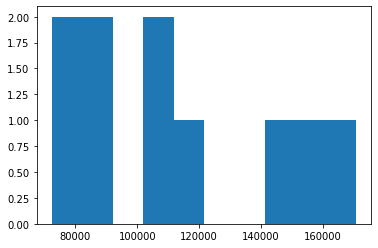

In [233]:
import matplotlib.pyplot as plt
plt.hist(clean_flat_ls)

#### What is the geographic distribution of the jobs? 

In [170]:
df['location_city'] = df['location'].str.findall("(.*)\,")

In [175]:
df['location_st'] = df['location'].str.findall("\,\s(.*)")

In [176]:
df['location_city'].value_counts()

[Seattle]          7
[]                 6
[San Francisco]    4
[Redmond]          2
[Washington]       1
[Fort Meade]       1
[Boston]           1
[Missouri City]    1
[Bellevue]         1
[Collierville]     1
Name: location_city, dtype: int64

#### What are the top 10 skills required for data scientist jobs?

#### I tokenize the jb to invistage the word frequence.

In [237]:
import nltk
from nltk import word_tokenize
jb = df.apply(lambda x: word_tokenize(x['Job Description'].lower()), axis=1)

In [238]:
from nltk.corpus import stopwords
stopwords = stopwords.words("english")

In [239]:
all_list = jb.to_list()

In [240]:
flat_ls = [item for sublist in all_list for item in sublist if item.isalpha() and item not in stopwords]

In [243]:
from nltk.probability import FreqDist
fdist = FreqDist(flat_ls)
fdist.most_common(10)

[('data', 236),
 ('experience', 104),
 ('science', 78),
 ('business', 78),
 ('work', 71),
 ('learning', 59),
 ('team', 56),
 ('skills', 48),
 ('scientist', 47),
 ('machine', 46)]

#### Relavent words are: experience, data, business, machine, learning, statistical, models, computer sciences, mathematics, product